In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [4]:
df.shape

(32, 5)

In [5]:
df.dtypes

Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#checking for duplicates
df.duplicated().any()

True

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#checking missing values
df.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

In [10]:
#filling missing value in feature 'calories'
df["Calories"]=df["Calories"].fillna(df["Calories"].mean())

In [11]:
# finding missing vale in date column
print(pd.date_range(start="2020-12-01", end="2020-12-31").difference(df['Date']))

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', freq=None)


In [12]:
df["Date"]=df["Date"].fillna("2020-12-22")

In [13]:
df.isnull().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [14]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,31.000000,31.000000,31.000000,31.000000
mean,68.709677,103.612903,128.774194,306.541379
std,71.180144,7.935899,13.119222,64.115560
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,252.000000
50%,60.000000,103.000000,128.000000,300.000000
75%,60.000000,107.000000,132.500000,342.650000
max,450.000000,130.000000,175.000000,479.000000


<AxesSubplot:>

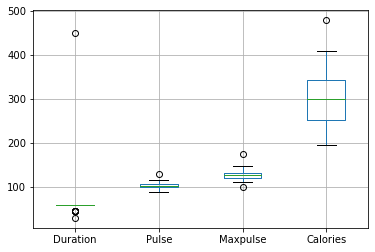

In [15]:
df.boxplot()

In [16]:
df[df['Duration']>60]

,Duration,Date,Pulse,Maxpulse,Calories
7,450,2020-12-08,104,134,253.3


In [17]:
# replacing possible incorrect value
df['Duration'].mask(df['Duration']==450,45,inplace=True)

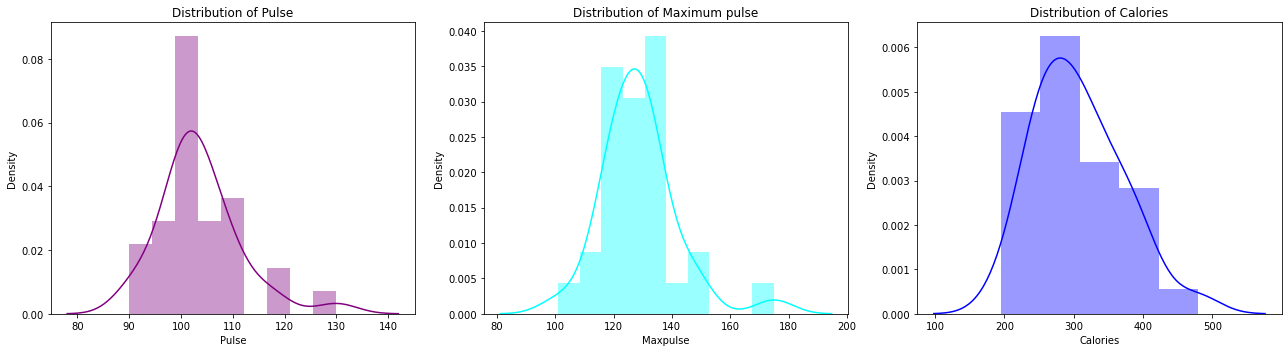

In [18]:
#distribution of continuous features

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.distplot(df["Pulse"],color="purple")
plt.title("Distribution of Pulse")

plt.subplot(1,3,2)
sns.distplot(df["Maxpulse"],color='cyan')
plt.title("Distribution of Maximum pulse")

plt.subplot(1,3,3)
sns.distplot(df["Calories"],color='blue')
plt.title("Distribution of Calories")

plt.tight_layout()

<AxesSubplot:xlabel='Duration', ylabel='count'>

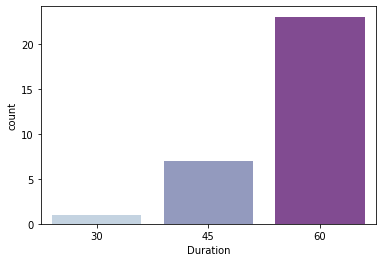

In [19]:
sns.countplot(df['Duration'],palette='BuPu')

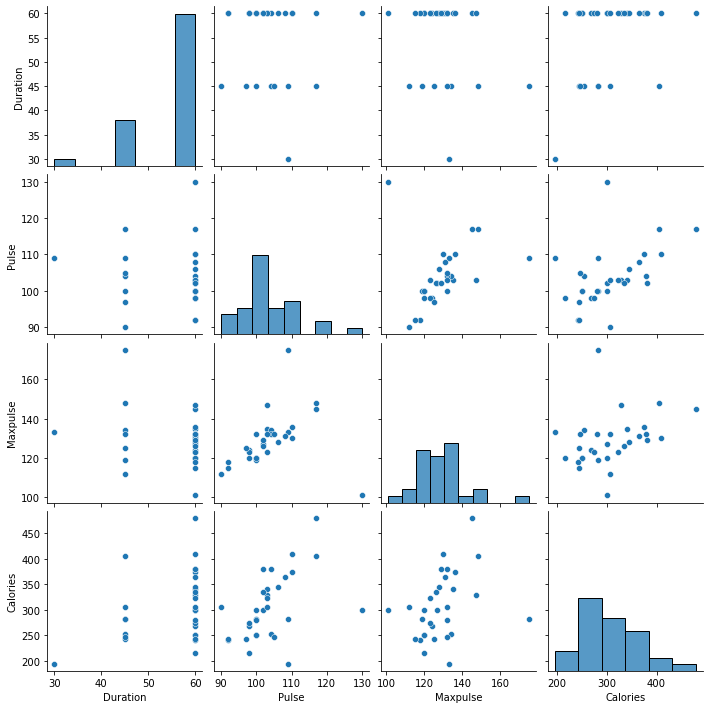

In [20]:
sns.pairplot(df)

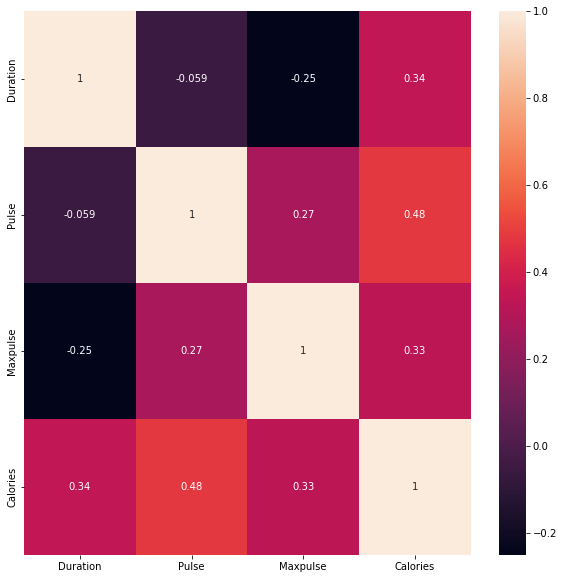

In [21]:
corr= df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)
plt.show()